<a href="https://colab.research.google.com/github/WagnerMiron/introducao_a_ciencia_de_dados/blob/main/Projeto_Final_An%C3%A1lise_de_Dados_e_Classifica%C3%A7%C3%A3o_dos_Passageiros_do_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final - Análise de Dados e Classificação dos Passageiros do Titanic.**

## Universidade Federal de Pernambuco

### **Tópicos Especiais em Projetos 4**

Aluno: Wagner de Andrade Miron

Professor: Francisco Fernando Roberto Pereira

### **1. Definição do Problema**
Este notebook implementa um algoritmo para prever a probabilidade de sobrevivência dos passageiros do Titanic, com base em suas características detalhadas a seguir. O modelo de classificação retornará valores binários: 0 indicando baixa chance de sobrevivência e 1 indicando alta chance de sobrevivência.

O banco de dados pode ser acessado através do link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

**Dados do problema:**

**Passageiro** - Identificação do Passageiro;

**Idade** - Idade do Passageiro;

**Sexo** - Sexo do Passageiro (0 = feminino, 1 = masculino);

**Classe** - Classe da cabine de viagem ( 1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Classe)



In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### 2. Definição do Dados

O dataset utilizado neste projeto foi obtido através da plataforma Kaggle, em formato .csv. O arquivo será carregado no repositório do GitHub do projeto, servindo como base de dados para as funções subsequentes. O script abaixo fornece o link de origem do arquivo e, em seguida, organiza os dados em colunas conforme os parâmetros apresentados no primeiro tópico. A função dataset.head() é utilizada para exibir as primeiras linhas da tabela, permitindo verificar se os dados foram importados corretamente.

In [ ]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/WagnerMiron/introducao_a_ciencia_de_dados/refs/heads/main/Titanic-Dataset.csv"

# Cabeçalho das colunas
colunas = ['Passageiro', 'Sobreviveu', 'Classe', 'Sexo', 'Idade']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

### 3. Análise de Dados

O código a seguir fornecem informações sobre o conjunto de dados a ser analisado, incluindo o tamanho da matriz, tipos de variáveis, consumo de memória, entre outros aspectos importantes.


In [ ]:
dataset.head()

,Passageiro,Sobreviveu,Classe,Sexo,Idade
0,1,0,3,1,22.0
1,2,1,1,0,38.0
2,3,1,3,0,26.0
3,4,1,1,0,35.0
4,5,0,3,1,35.0


In [ ]:
# Dimensões do dataset
print(dataset.shape)

(891, 5)


In [ ]:
# Informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passageiro  891 non-null    int64  
 1   Sobreviveu  891 non-null    int64  
 2   Classe      891 non-null    int64  
 3   Sexo        891 non-null    int64  
 4   Idade       714 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB
None


### 3.2 Seleção das Features e Definição da Variável Alvo

No código abaixo iremos preparar o conjunto de dados para que o modelo possa interpretar a influência das variáveis de entrada em relação à variável de saída. Para isso, os dados serão divididos em conjuntos de treino e teste. Em seguida, será feita a análise dos valores máximos e mínimos de cada coluna, permitindo avaliar a variação de cada parâmetro no conjunto de dados.

In [ ]:
# Selecionando as features e a variável alvo
X = dataset[['Passageiro', 'Classe', 'Sexo', 'Idade']]
y = dataset['Sobreviveu']

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
min_values = dataset.min()

# Exibe o valor máximo de cada coluna
max_values = dataset.max()

# Exibe os mínimos e máximos de todas as colunas
print("Mínimos de cada coluna:\n", min_values)
print("\nMáximos de cada coluna:\n", max_values)

Mínimos de cada coluna:
 Passageiro    1.00
Sobreviveu    0.00
Classe        1.00
Sexo          0.00
Idade         0.42
dtype: float64

Máximos de cada coluna:
 Passageiro    891.0
Sobreviveu      1.0
Classe          3.0
Sexo            1.0
Idade          80.0
dtype: float64


### 3.3 Criação do Pipeline de Pré-Processamento

A criação de um pipeline de pré-processamento é essencial após a análise da variação entre os valores máximos e mínimos, garantindo que os dados estejam adequadamente preparados para o modelo de classificação. Este processo oferece várias vantagens, como:

   **Automatização do pré-processamento**, evitando a repetição de tarefas manuais;

 **Consistência na aplicação das etapas** tanto nos dados de treino quanto nos de teste;

  **Facilidade para experimentar diferentes modelos** e estratégias de pré-processamento sem a necessidade de reescrever grandes partes do código.

Essa abordagem otimiza o fluxo de trabalho e assegura a preparação adequada dos dados para o modelo.

Métodos de Processamento Utilizados:

**I. Escalonamento (Normalização/Padronização)**

As colunas selecionadas possuem diferentes escalas e variações. Para evitar que essas discrepâncias influenciem os modelos de machine learning, aplicamos técnicas de escalonamento para padronizar os valores.

**II. Tratamento de Variáveis Categóricas**

Colunas categóricas foram convertidas para um formato numérico apropriado, permitindo que os modelos de machine learning possam utilizá-las adequadamente no processo de treinamento.

**III. Transformação de Variáveis**

Algumas variáveis foram transformadas para melhorar a distribuição dos dados, facilitando o processamento pelo modelo e ajudando a lidar com assimetrias nas distribuições.

In [ ]:
# Colunas numéricas e categóricas
num_features = ['Passageiro', 'Idade']
cat_features = ['Classe', 'Sexo']

# Imputação de valores e escalonamento
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Imputação e codificação One-Hot
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinando os pipelines numérico e categórico
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# Pipeline final com o modelo de classificação
from sklearn.ensemble import RandomForestClassifier

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Ajustando o modelo aos dados de treino
model_pipeline.fit(X_train, y_train)

# Previsões e avaliação
y_pred = model_pipeline.predict(X_test)

### 3.4 Grid Search com Validação Cruzada

O Grid Search é uma técnica que auxilia na otimização dos hiperparâmetros do modelo, testando diversas combinações e validando os resultados em diferentes divisões dos dados, reduzindo o risco de overfitting.

Passos:

**I. Definição dos Hiperparâmetros**

Especificar os possíveis valores para os hiperparâmetros, como o número de árvores (n_estimators), profundidade máxima (max_depth), entre outros.

**II. Execução do Grid Search**

Realizar a busca dos melhores hiperparâmetros utilizando validação cruzada. Neste exemplo, a validação cruzada será feita com 5 divisões dos dados de treino e teste.

**III. Avaliação dos Resultados**

Analisar os melhores hiperparâmetros encontrados e o desempenho do modelo com essas configurações, verificando o impacto na performance.

In [ ]:
# Definindo os modelos
modelos_params = {
    'Regressão Logística': {
        'modelo': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        }
    },
    'Random Forest': {
        'modelo': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'modelo': SVC(probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10],
            'classifier__criterion': ['gini', 'entropy']
        }
    }
}

In [ ]:
# Grid Search com validação cruzada para cada modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
resultados = []

for nome, mp in modelos_params.items():
    modelo = mp['modelo']
    params = mp['params']

    # Pipeline com o modelo atual
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])

    # Grid Search com validação cruzada
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

    # Treinando o modelo
    grid_search.fit(X_train, y_train)

    # Melhor modelo encontrado
    best_model = grid_search.best_estimator_

    # Previsões no conjunto de teste
    y_pred = best_model.predict(X_test)

    # Calculando métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Resultados
    resultados.append({
        'Modelo': nome,
        'Melhores Hiperparâmetros': grid_search.best_params_,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Pipeline': best_model
    })


In [ ]:
# Comparando os modelos otimizados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)
df_resultados.reset_index(drop=True, inplace=True)
df_resultados[['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score', 'Melhores Hiperparâmetros']]

,Modelo,Acurácia,Precisão,Recall,F1-Score,Melhores Hiperparâmetros
0,Random Forest,0.832402,0.866667,0.702703,0.776119,"{'classifier__max_depth': 10, 'classifier__n_e..."
1,KNN,0.821229,0.850000,0.689189,0.761194,"{'classifier__n_neighbors': 5, 'classifier__we..."
2,SVM,0.815642,0.872727,0.648649,0.744186,"{'classifier__C': 10, 'classifier__kernel': 'r..."
3,Regressão Logística,0.798883,0.787879,0.702703,0.742857,"{'classifier__C': 1, 'classifier__penalty': 'l2'}"
4,Árvore de Decisão,0.793296,0.849057,0.608108,0.708661,"{'classifier__criterion': 'gini', 'classifier_..."


**SVM (Support Vector Machine)**

O SVM é um algoritmo supervisionado usado para classificação e regressão. Ele busca o hiperplano que melhor separa as classes, maximizando a margem entre elas. Funciona com dados lineares e não lineares, utilizando diferentes kernels (como linear, polinomial e RBF) para transformar os dados e facilitar a separação das classes.

**Random Forest**

O Random Forest é um modelo de ensemble que combina várias árvores de decisão, usando amostras aleatórias dos dados e características. Ele reduz o overfitting e oferece previsões mais estáveis através de votação (para classificação) ou média (para regressão).

**Regressão Logística**

A regressão logística é usada para prever a probabilidade de eventos binários, transformando uma combinação linear das variáveis em um valor entre 0 e 1. É amplamente utilizada para classificação binária, como em diagnósticos e análise de crédito.

**Árvore de Decisão**

Este algoritmo toma decisões por meio de um modelo em formato de árvore, onde cada nó representa uma pergunta sobre uma característica. Fácil de interpretar, mas propenso ao overfitting, especialmente em dados complexos.

**KNN (K-Nearest Neighbors)**

O KNN classifica um ponto com base nos 'k' vizinhos mais próximos, atribuindo a classe mais comum ou calculando a média (para regressão). Simples e eficaz, mas pode ser computacionalmente pesado para grandes conjuntos de dados e sensível à escolha de 'k' e à escala das características.


### 3.5 Melhor modelo com base nos resultados obtidos

In [ ]:
# Selecionando o melhor modelo baseado no F1-Score
melhor_modelo = df_resultados.loc[0, 'Modelo']
melhor_pipeline = df_resultados.loc[0, 'Pipeline']

print(f"O melhor modelo foi: {melhor_modelo}")
print(f"Com os hiperparâmetros: {df_resultados.loc[0, 'Melhores Hiperparâmetros']}")

O melhor modelo foi: Random Forest
Com os hiperparâmetros: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}


### 4. Visualizações Unimodais

**4.1. Histograma**

O histograma é uma ferramenta essencial na análise exploratória de dados, oferecendo uma visualização clara da distribuição de uma variável contínua. Ele permite identificar facilmente o comportamento dos dados, como se seguem uma distribuição normal (simétrica), se estão enviesados (skewed) ou se apresentam outros padrões, como distribuições uniformes ou bimodais (com dois picos).

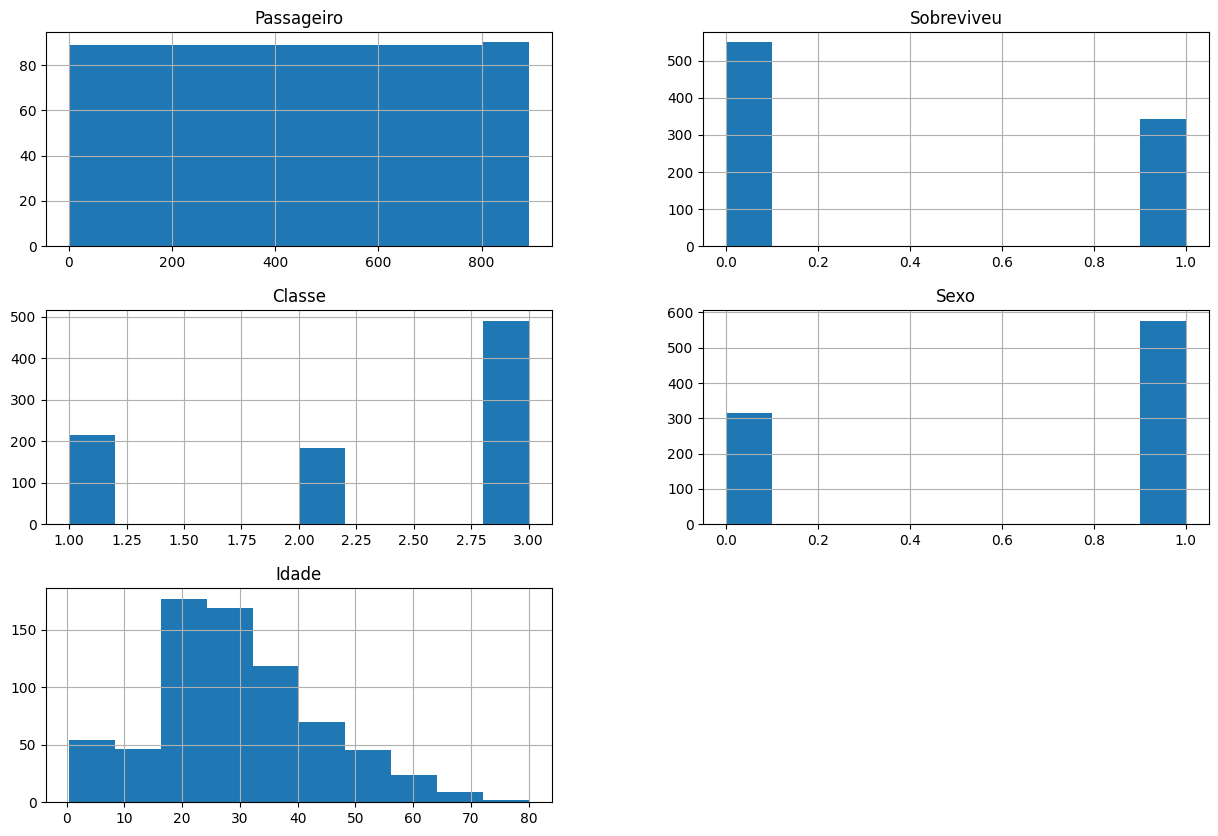

In [ ]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

**4.2 Gráfico de Densidade**

O Gráfico de Densidade, ou Density Plot, é semelhante ao histograma, mas oferece uma visualização mais suave da distribuição dos dados. Ele permite identificar de forma mais clara a distribuição dos atributos do conjunto de dados.

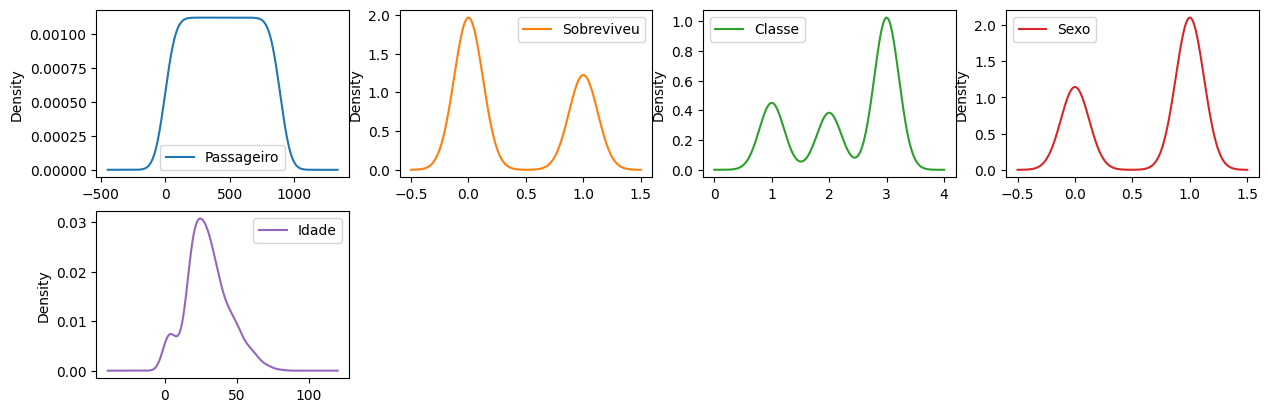

In [ ]:
# Gráfico de densidade
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

### 5. Visualizações Multimodais

Ao examinar as correlações entre os atributos por meio da matriz de correlação, podemos identificar uma estrutura na disposição dos atributos. A coloração azul ao longo da diagonal sugere que os atributos próximos tendem a apresentar uma correlação mais forte entre si. Em contraste, as áreas em vermelho indicam uma correlação negativa moderada entre alguns atributos.
A covariância expressa como duas variáveis numéricas estão inter-relacionadas. Existem várias maneiras de quantificar a correlação, sendo o coeficiente de correlação de Pearson uma das mais utilizadas. Este coeficiente pode ser interpretado da seguinte forma:

Próximo de -1: indica uma forte correlação negativa entre as variáveis;

Próximo de +1: indica uma forte correlação positiva entre as variáveis;

Igual a 0: sugere que não há correlação entre as variáveis.

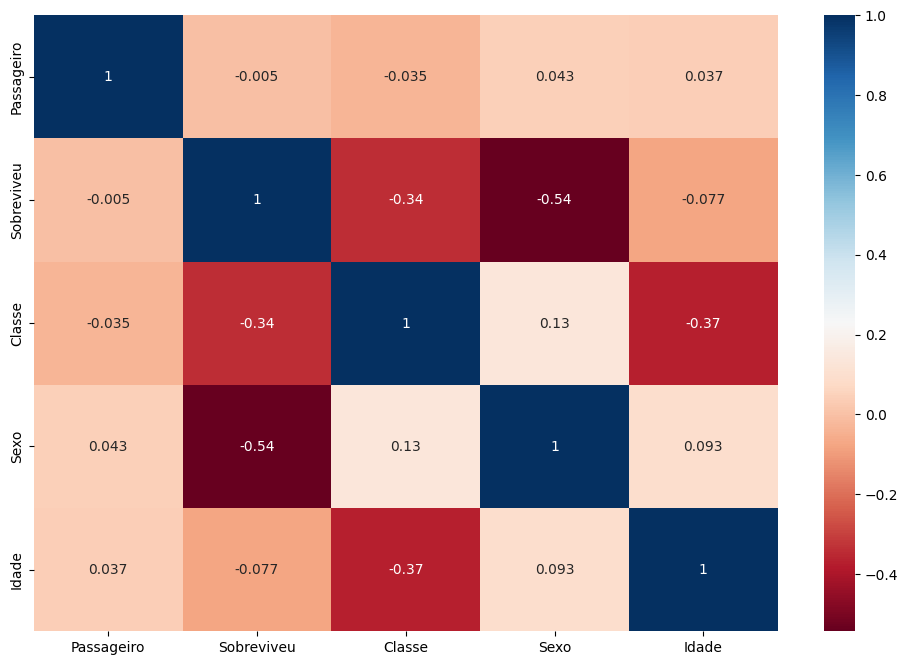

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(12, 8))  # Ajuste os valores conforme necessário (largura, altura)

# Matriz de Correlação com Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu')

# Exibindo o gráfico
plt.show()

O gráfico de dispersão ilustra a relação entre duas variáveis quantitativas, onde cada ponto representa uma observação, com um eixo para cada variável. Ele permite identificar padrões e correlações, como positivas (linha ascendente) ou negativas (linha descendente), e facilita a detecção de outliers. Além disso, é uma ferramenta útil para análises de regressão, ajudando a determinar a adequação de modelos lineares aos dados.

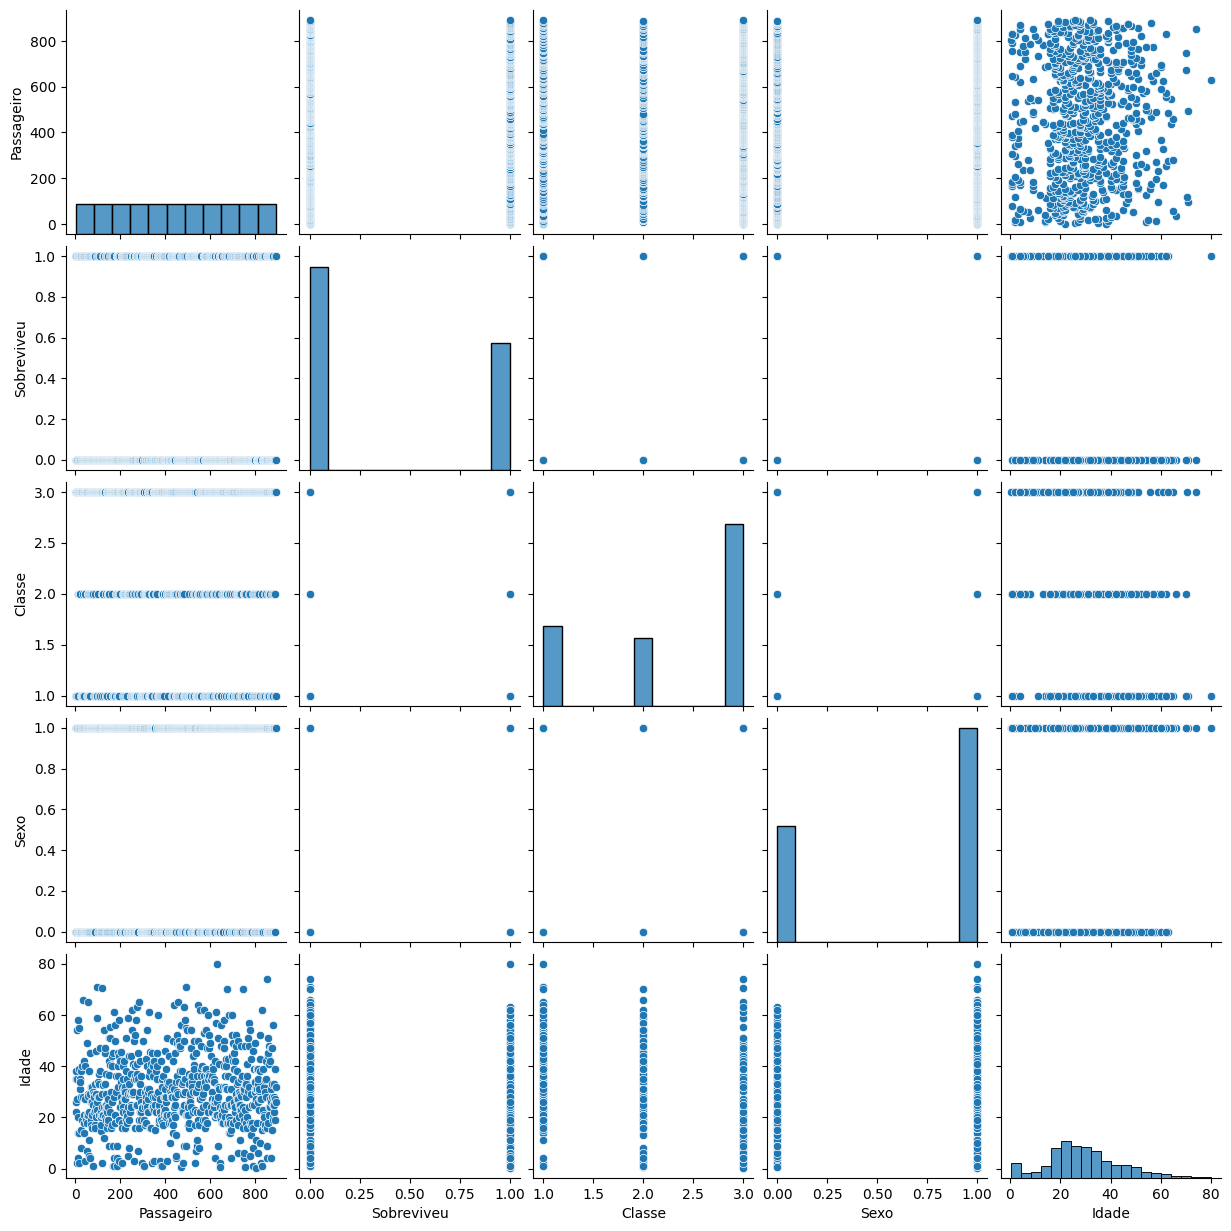

In [ ]:
 #Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

### 6. Conclusão

A análise da relação entre a sobrevivência dos passageiros do Titanic e fatores como idade, sexo e classe da cabine revela insights significativos sobre as dinâmicas sociais e as condições da época. Os dados mostram que as mulheres e as crianças tinham uma probabilidade significativamente maior de sobrevivência em comparação aos homens, evidenciando a prioridade dada a esses grupos durante a evacuação. Além disso, os passageiros das classes mais altas apresentaram taxas de sobrevivência mais elevadas, sugerindo que privilégios sociais influenciaram o acesso a recursos e embarcações salva-vidas.